In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/Reccomender-system-anime'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
df = pd.read_csv('anime.csv')
df.head(3)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262


In [4]:
df2 = pd.read_csv('rating-database/rating.csv')
df2.head(3)

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1


In [5]:
# Its a snowflake data schemea just to reduce the overhead of analytics part
# menghubungkan dua tabel dengan kondisi id yang sama
data = pd.merge(df,df2,on='anime_id')
data.head()

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1


In [6]:
# info tabel data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7813727 entries, 0 to 7813726
Data columns (total 9 columns):
 #   Column    Dtype  
---  ------    -----  
 0   anime_id  int64  
 1   name      object 
 2   genre     object 
 3   type      object 
 4   episodes  object 
 5   rating_x  float64
 6   members   int64  
 7   user_id   int64  
 8   rating_y  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 596.1+ MB


In [12]:
data.drop(['rating_x','episodes'], axis=1)
data.head(3)

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10


TV         5283596
Movie      1051998
OVA         800307
Special     559366
ONA          91956
Music        26500
Name: type, dtype: int64


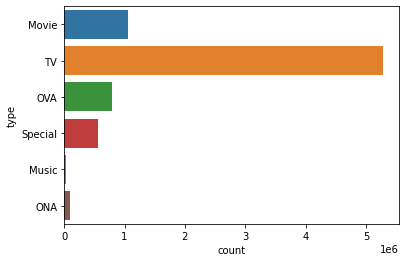

In [7]:
# melihat distribusi data berdasarkan tipe
sns.countplot(y='type', data=data)

# menghitung banyak nya data berdasarkan tipe animenya
print(data['type'].value_counts())

<AxesSubplot:xlabel='count', ylabel='type'>

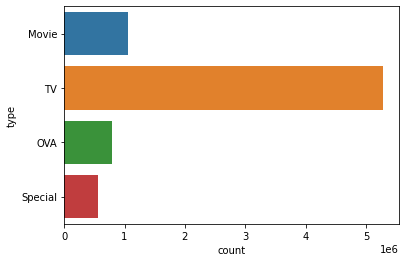

In [8]:
# membuat dataframe yang hanya berisi anime tanpa tipe musik
data = data[data['type'] != 'Music']

# membuat dataframe dengan data yang tanpa tipe ONA
data1 = data[data['type'] != 'ONA']

# menampilkan grafik anime tanpa tipe ONA dan music
sns.countplot(y='type', data=data1)

In [9]:
# membuat dataframe anime bertipe movie
data_movie = data1[data1['type'] == 'Movie']

# membuat dataframe anime bertipe TV
data_tv = data1[data1['type'] == 'TV']

# membuat dataframe anime bertipe special
data_special = data1[data1['type'] == 'Special']

# menampilkan data anime hanya bertipe movie
data_movie.head()

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1


In [10]:
# lets make a new columns for the average rating including the imdb and customer rating.
# membuat kolom baru rata rata rating anime bertipe movie
data_movie["Average_rating"] = (data_movie['rating_x'] + data_movie['rating_y'])//2
data_movie

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y,Average_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5,7.0
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10,9.0
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10,9.0
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10,9.0
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1,4.0
...,...,...,...,...,...,...,...,...,...,...
7813575,11141,Blue Seagull,"Action, Hentai",Movie,1,4.60,337,68508,6,5.0
7813650,20007,Hi Gekiga Ukiyoe Senya Ichiya,"Action, Hentai",Movie,1,1.92,129,27364,-1,0.0
7813651,20007,Hi Gekiga Ukiyoe Senya Ichiya,"Action, Hentai",Movie,1,1.92,129,48766,-1,0.0
7813725,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142,27364,-1,2.0


In [ ]:
# newd=data_movie.['rating_y']
# (data_movie.groupby("name")['rating_y']+data_movie.groupby("name")['rating_x']).mean().sort_values(ascending=False)

In [14]:
# Melihat banyaknya user yang merating/menilai anime bertipe movie
data_movie.groupby("name")['Average_rating'].count().sort_values(ascending=False)

name
Sen to Chihiro no Kamikakushi    22974
Howl no Ugoku Shiro              17258
Mononoke Hime                    16303
Byousoku 5 Centimeter            14304
Toki wo Kakeru Shoujo            13053
                                 ...  
TWD Express Rolling Takeoff          1
Syupeo Taegwon V                     1
Qi Cai Lao Fu Zi                     1
No Game No Life Movie                0
Cencoroll 2                          0
Name: Average_rating, Length: 2142, dtype: int64

In [16]:
# membuat dataframe final untuk meninjau movie berdasarkan rata rata dari Average rating
final=pd.DataFrame(data_movie.groupby("name")['Average_rating'].mean().sort_values(ascending=False))
final

,Average_rating
name,
Kimi no Na wa.,8.324693
Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare,8.044752
Koe no Katachi,7.636364
Ookami Kodomo no Ame to Yuki,7.522247
Suzumiya Haruhi no Shoushitsu,7.486216
...,...
Doubutsu Olympic Taikai,1.000000
Henkei Sakuhin Dai 1-ban,1.000000
Hi Gekiga Ukiyoe Senya Ichiya,0.000000


In [17]:
# melihat jumlah rating anime berdasarkan rating user (rating_y) #banyak nya user yang melakukan penilaian
data_movie.groupby("name")['rating_y'].count().sort_values(ascending=False)

name
Sen to Chihiro no Kamikakushi                       22974
Howl no Ugoku Shiro                                 17258
Mononoke Hime                                       16303
Byousoku 5 Centimeter                               14304
Toki wo Kakeru Shoujo                               13053
                                                    ...  
Taabou no Ryuuguusei Daitanken                          1
Kuripuri*Kuripura                                       1
TWD Express Rolling Takeoff                             1
Syupeo Taegwon V                                        1
Sore Ike! Anpanman: Anpanman to Okashi na Nakama        1
Name: rating_y, Length: 2142, dtype: int64

In [18]:
# menambahkan kolom baru 'no_of_rating' (banyaknya user yang melakukan penilaian)
final['no_of_ratings'] = data_movie.groupby("name")['rating_y'].count().sort_values(ascending=False)

In [19]:
# After combing the rating of the user and the original.. Our Data is more compact and clean now
final.head()
# most of the ratings lies between the range 4.5-8

,Average_rating,no_of_ratings
name,,
Kimi no Na wa.,8.324693,2199
Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare,8.044752,2525
Koe no Katachi,7.636364,44
Ookami Kodomo no Ame to Yuki,7.522247,7709
Suzumiya Haruhi no Shoushitsu,7.486216,9576


Bisa dilihat bahwa rata rata user memberikan rating terhadap anime direntang 4 - 8


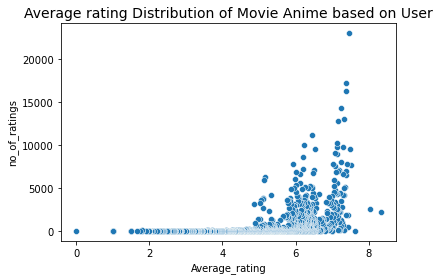

In [23]:
# melihat distribusi anime berdasarkan average rating dan jumlah user yang melakukan peratingan
sns.scatterplot(y='no_of_ratings',x='Average_rating',data=final)
plt.title("Average rating Distribution of Movie Anime based on User", Fontsize= 14)
print("Bisa dilihat bahwa rata rata user memberikan rating terhadap anime direntang 4 - 8")

<AxesSubplot:>

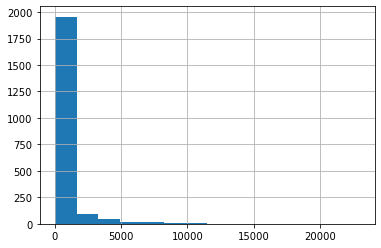

In [24]:
# melihat distribusi banyaknya user yang melakukan penilaian
# bisa dilihat bahwa sebagain besar Anime dinilai oleh 2000 user
# ini juga untuk melihat apakah data sudah berdistribusi normal?
# ternyata data tidak berdistribusi normal
final['no_of_ratings'].hist(bins=14)

<AxesSubplot:>

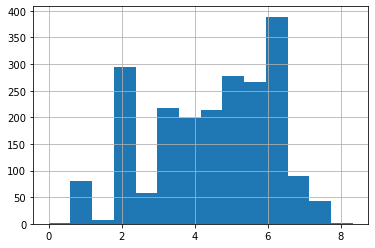

In [25]:
# melihat apakah distribusi rata rata penilaian rating anime oleh user sudah berdistribusi normal?
# opsi lain akan dilakukan transformasi
final['Average_rating'].hist(bins=14)
# Data is not normally distributed, but we are getting what we needed. 

Recommendation System

In [10]:
final.no_of_ratings.sort_values(ascending=False)

name
Sen to Chihiro no Kamikakushi                            22974
Howl no Ugoku Shiro                                      17258
Mononoke Hime                                            16303
Byousoku 5 Centimeter                                    14304
Toki wo Kakeru Shoujo                                    13053
                                                         ...  
Neko to Nezumi                                               1
Juu-nin no Chiisa na Indian                                  1
Ginga Tetsudou 999: Niji no Michishirube                     1
Asu wo Tsukutta Otoko: Tanabe Sakurou to Biwako Sosui        1
No Game No Life Movie                                        1
Name: no_of_ratings, Length: 2142, dtype: int64

In [11]:
final.head()

,Average_rating,no_of_ratings
name,,
Kimi no Na wa.,8.324693,2199
Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare,8.044752,2525
Koe no Katachi,7.636364,44
Ookami Kodomo no Ame to Yuki,7.522247,7709
Suzumiya Haruhi no Shoushitsu,7.486216,9576


In [27]:
# making a pivot table to get the matrix form
# of our data on the basis of mv name,user id and their rating
mov_pivot = data_movie.pivot_table(index='user_id',columns='name',values='Average_rating')
mov_pivot.to_csv('Ngecek1.csv')

In [28]:
final.sort_values('Average_rating',ascending = False).head()

,Average_rating,no_of_ratings
name,,
Kimi no Na wa.,8.324693,2199
Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare,8.044752,2525
Koe no Katachi,7.636364,44
Ookami Kodomo no Ame to Yuki,7.522247,7709
Suzumiya Haruhi no Shoushitsu,7.486216,9576


In [30]:
Kimi = mov_pivot['Kimi no Na wa.']
Kimi.value_counts()

9.0    1691
8.0     248
4.0     238
7.0      20
5.0       1
6.0       1
Name: Kimi no Na wa., dtype: int64

In [31]:
# yang tidak merating
Kimi.isnull().sum()

54299

In [32]:
Nan_Value=73515 - Kimi.isnull().sum()
Nan_Value

19216

In [33]:
second = mov_pivot['Ookami Kodomo no Ame to Yuki']
second.value_counts()

8.0    3534
9.0    2436
3.0    1081
7.0     612
6.0      38
5.0       6
4.0       2
Name: Ookami Kodomo no Ame to Yuki, dtype: int64

In [34]:
SimilarToKimi=mov_pivot.corrwith(Kimi)
SimilarToKimi

name
&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu         NaN
&quot;Bungaku Shoujo&quot; Movie                                    0.611051
.hack//G.U. Trilogy                                                 0.324129
.hack//The Movie: Sekai no Mukou ni                                 0.704359
009 Re:Cyborg                                                       0.674577
                                                                      ...   
Zouressha ga Yatte Kita                                                  NaN
Zutto Mae kara Suki deshita.: Kokuhaku Jikkou Iinkai                0.739636
eX-Driver the Movie                                                 1.000000
gdgd Fairies Movie: tte Iu Eiga wa Dou kana...?                          NaN
xxxHOLiC Movie: Manatsu no Yoru no Yume                             0.633971
Length: 2140, dtype: float64

In [35]:
corr_kimi = pd.DataFrame(SimilarToKimi,columns=['correlation'])
corr_kimi

,correlation
name,
"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",NaN
&quot;Bungaku Shoujo&quot; Movie,0.611051
.hack//G.U. Trilogy,0.324129
.hack//The Movie: Sekai no Mukou ni,0.704359
009 Re:Cyborg,0.674577
...,...
Zouressha ga Yatte Kita,NaN
Zutto Mae kara Suki deshita.: Kokuhaku Jikkou Iinkai,0.739636
eX-Driver the Movie,1.000000


In [38]:
pd.DataFrame(corr_kimi.iloc[:,0].values)

,0
0,NaN
1,0.611051
2,0.324129
3,0.704359
4,0.674577
...,...
2135,NaN
2136,0.739636
2137,1.000000
2138,NaN


In [42]:
# Mengisi nan value dengan nilai 0
corr_kimi['correlation']=corr_kimi['correlation'].fillna(0)
print('Missing value pada tavel corr_kimi adalah ', corr_kimi.isna().sum())

Missing value pada tavel corr_kimi adalah  correlation    0
dtype: int64


In [44]:
# jumlah data di tabel corr_kimi
corr_kimi.count()

correlation    2140
dtype: int64

In [47]:
# Jumlah data setelah nilai dengan rating nol dihilangkan
corr_kimi[corr_kimi['correlation']!=0.000000].count()

correlation    840
dtype: int64

In [48]:
corr_kimi = corr_kimi[corr_kimi['correlation']!=0.000000]

In [49]:
corr_kimi.sort_values('correlation',ascending=False).head(5)

,correlation
name,
Smile Precure! Movie: Ehon no Naka wa Minna Chiguhagu!,1.0
Doraemon Movie 10: Nobita no Nippon Tanjou,1.0
Yona Yona Penguin,1.0
Yousei Florence,1.0
Crayon Shin-chan Movie 13: Densetsu wo Yobu Buriburi 3 Pun Dai Shingeki,1.0


In [55]:
# what if its all one user ratings
corr_kimi = corr_kimi.join(final['no_of_ratings'])

ValueError: columns overlap but no suffix specified: Index(['no_of_ratings'], dtype='object')

In [56]:
corr_kimi

,correlation,no_of_ratings
name,,
&quot;Bungaku Shoujo&quot; Movie,0.611051,1535
.hack//G.U. Trilogy,0.324129,1118
.hack//The Movie: Sekai no Mukou ni,0.704359,446
009 Re:Cyborg,0.674577,291
00:08,0.384615,43
...,...,...
Yu☆Gi☆Oh! (1999),0.452413,1495
Yu☆Gi☆Oh!: Hikari no Pyramid,0.441942,2375
Zutto Mae kara Suki deshita.: Kokuhaku Jikkou Iinkai,0.739636,451


In [61]:
# memfilter tabel corr_kimi dan hanya melihat anime dengan jumlah perating > 1000
corr_kimi=corr_kimi[corr_kimi['no_of_ratings'] > 1000]
print(corr_kimi.head())
print('/nbanyaknya data pada corr_kim :', corr_kimi.count())

                                  correlation  no_of_ratings
name                                                        
&quot;Bungaku Shoujo&quot; Movie     0.611051           1535
.hack//G.U. Trilogy                  0.324129           1118
Aa! Megami-sama! Movie               0.208486           1835
Afro Samurai: Resurrection           0.668187           2881
Air Movie                            0.523059           2515
/nbanyaknya data pada corr_kim : correlation      263
no_of_ratings    263
dtype: int64


In [62]:
# getiing genuine results by filtering on the basis of no of ratings
# merapihkan data dan hanya melihat anime yang mempunyai korelasi tertinggi
# dan dinilai oleh banyak user (lebih dari 1000 user)
corr_kimi.sort_values('correlation',ascending=False).head(5)

,correlation,no_of_ratings
name,,
Kimi no Na wa.,1.000000,2199
Lupin III: Cagliostro no Shiro,0.835557,1586
Toaru Majutsu no Index: Endymion no Kiseki,0.768747,2245
Omoide no Marnie,0.767510,1319
Kokoro ga Sakebitagatterunda.,0.762505,1059


Note: All the series are verifed by me and trust me, They are really correlated. Wynkk